In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, LeakyReLU, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import adam

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_test -= x_test.min()
x_test = x_test/x_test.max()
y_train = np_utils.to_categorical(y_train ,10)
y_test = np_utils.to_categorical(y_test, 10)

實作sequential

In [5]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), padding = 'same', input_shape = (28, 28, 1)),
    MaxPooling2D(),
    LeakyReLU(alpha = 0.3),
    Dropout(0.25),
    
    Conv2D(32, (3, 3), padding = 'same'),
    MaxPooling2D(),
    LeakyReLU(alpha = 0.3),
    Dropout(0.25), 
    
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.25),
    Dense(32, activation = 'relu'), 
    Dropout(0.25), 
    Dense(10, activation = 'softmax')
    
])

In [6]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 32)          0         
__________

In [7]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [8]:
model_cnn_fit = model_cnn.fit(x_train, y_train, batch_size = 100, epochs = 30)
score = model_cnn.evaluate(x_test, y_test)

Epoch 1/30
60000/60000 [==============================] - 123s 2ms/step - loss: 0.4220 - acc: 0.8647
Epoch 2/30
60000/60000 [==============================] - 122s 2ms/step - loss: 0.1359 - acc: 0.9614
Epoch 3/30
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0992 - acc: 0.9720
Epoch 4/30
60000/60000 [==============================] - 124s 2ms/step - loss: 0.0831 - acc: 0.9772
Epoch 5/30
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0721 - acc: 0.9799
Epoch 6/30
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0640 - acc: 0.9823
Epoch 7/30
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0570 - acc: 0.9839
Epoch 8/30
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0529 - acc: 0.9847
Epoch 9/30
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0498 - acc: 0.9861
Epoch 10/30
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0452 - acc: 

Testing loss:  0.030397739534675613
Testing acc:  0.9924


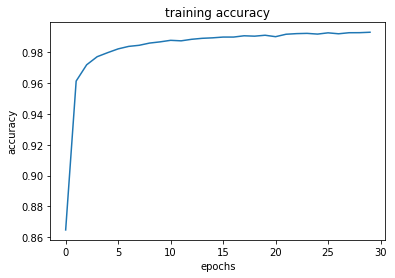

In [9]:
plt.plot(model_cnn_fit.history['acc'])
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
print('Testing loss: ', score[0])
print('Testing acc: ', score[1])

實作Functional API

In [10]:
from keras.layers import Input, concatenate, Softmax
from keras.models import Model

In [11]:
x = Input(shape = (28, 28, 1))
conv1 = Conv2D(32, (3, 3), padding = 'same')
max1 = MaxPooling2D()
re1 = LeakyReLU(alpha = 0.3)
dp1 = Dropout(0.25)
conv2 = Conv2D(32, (3, 3), padding = 'same')
max2 = MaxPooling2D()
re2 = LeakyReLU(alpha = 0.3)
dp2 = Dropout(0.25) 
flat = Flatten()
fc1 = Dense(128, activation = 'relu')
dp3 = Dropout(0.25)
fc2 = Dense(32, activation = 'relu') 
dp4 = Dropout(0.25)
fc3 = Dense(10, activation = 'softmax')

In [12]:
out = fc3(dp4(fc2(dp3(fc1(flat(dp2(re2(max2(conv2(dp1(re1(max1(conv1(x))))))))))))))

In [13]:
model_api = Model(x, out)
model_api.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
__________

In [14]:
model_api.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [15]:
model_api_fit = model_api.fit(x_train, y_train, batch_size = 100, epochs = 30)
score = model_api.evaluate(x_test, y_test)

Epoch 1/30
60000/60000 [==============================] - 55s 912us/step - loss: 0.4376 - acc: 0.8628
Epoch 2/30
60000/60000 [==============================] - 54s 896us/step - loss: 0.1512 - acc: 0.9579
Epoch 3/30
60000/60000 [==============================] - 54s 906us/step - loss: 0.1109 - acc: 0.9696
Epoch 4/30
60000/60000 [==============================] - 52s 868us/step - loss: 0.0873 - acc: 0.9750
Epoch 5/30
60000/60000 [==============================] - 52s 869us/step - loss: 0.0762 - acc: 0.9789
Epoch 6/30
60000/60000 [==============================] - 52s 869us/step - loss: 0.0679 - acc: 0.9811
Epoch 7/30
60000/60000 [==============================] - 52s 866us/step - loss: 0.0608 - acc: 0.98232s -
Epoch 8/30
60000/60000 [==============================] - 52s 870us/step - loss: 0.0553 - acc: 0.9843
Epoch 9/30
60000/60000 [==============================] - 52s 868us/step - loss: 0.0528 - acc: 0.98510s - loss: 0.0531 - acc: 
Epoch 10/30
60000/60000 [============================

Testing loss:  0.028605070606908724
Testing acc:  0.9924


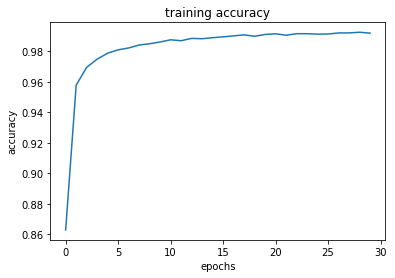

In [16]:
plt.plot(model_api_fit.history['acc'])
plt.title('training accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
print('Testing loss: ', score[0])
print('Testing acc: ', score[1])

結果十分接近 (合理)